In [2]:
pwd

'/Users/gemunu/Research/canis/canis'

In [37]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [32]:
alp_b=pd.read_csv('alpha_bright.dat',header=None,sep=' ')

In [40]:
alp_f2=pd.read_csv('alpha_faint2.dat',header=None,sep=' ')

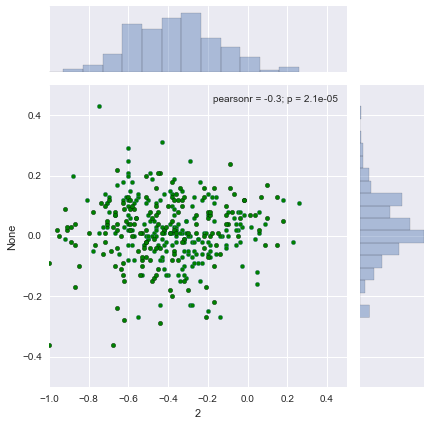

In [50]:
nn=sns.jointplot(alp_b[2],alp_b[1]-alp_b[2],xlim=(-1,0.5),ratio=4,c='g')
nn.x=alp_f1[2]
nn.y=alp_f1[1]-alp_f1[2]
nn.plot_joint(plt.scatter,c='g')
nn.x=alp_f2[2]
nn.y=alp_f2[1]-alp_f2[2]
nn.plot_joint(plt.scatter,c='g')

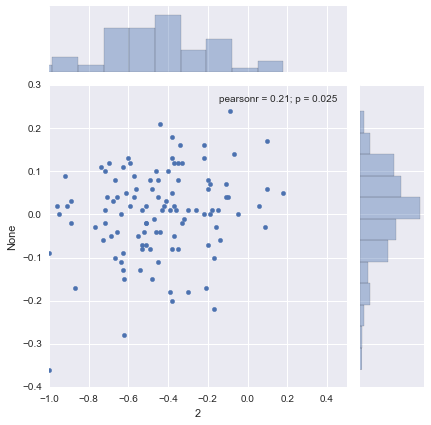

In [34]:
alp_f1=pd.read_csv('alpha_faint1.dat',header=None,sep=' ')
sns.jointplot(alp_f1[2],alp_f1[1]-alp_f1[2],xlim=(-1,0.5),ratio=4)

In [55]:
alp_all=alp_b.append(alp_f1,ignore_index=True).append(alp_f2,ignore_index=True)

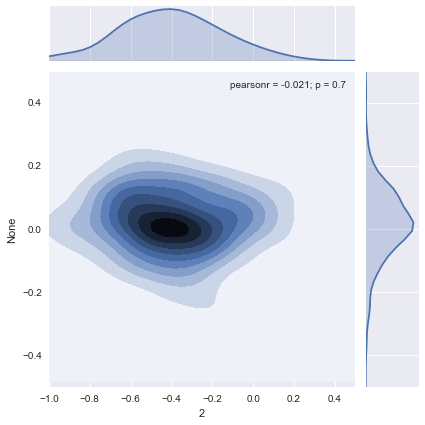

In [58]:
sns.jointplot(alp_all[2],alp_all[1]-alp_all[2],xlim=(-1,0.5),kind='kde',ylim=(-0.5,0.5))

In [ ]:
df1=pd.read_csv('paras.dat',sep=' ',header=None)
df2=pd.read_csv('paras_faint.dat',sep=' ',header=None)
df3=pd.read_csv('paras_faint_2.dat',sep=' ',header=None)

In [ ]:
df=df1.append([df2,df2],ignore_index=True)

In [ ]:
sns.distplot(df[5])

In [ ]:
df['err_t']=(df[3]-df[1])/2

In [ ]:
defa=df.convert_objects(convert_numeric=True,)

In [ ]:
defa['err_g']=(defa[6]-defa[5])/2
defa['err_g']=defa['err_g'].round(2)

In [ ]:
defan=pd.DataFrame([defa[0],defa[1],defa['err_t'],defa[4],defa['err_g']]).transpose()

In [ ]:
defan.to_csv('rc_full_para.dat',sep='\t',index=False,header=False)

In [ ]:
ls

In [ ]:
cd -

In [7]:
mags=pd.read_csv('ALL-2MASS-matched.csv')

In [10]:
mags.head(4)

,ID,Vmag,Vmag_ERR,UmB,UmB_ERR,BmV,BmV_ERR,VmR,VmR_ERR,VmI,...,cc_flg,gal_contam,mp_flg,pts_key,j_m_stdap,j_msig_stdap,h_m_stdap,h_msig_stdap,k_m_stdap,k_msig_stdap
0,1467,16.2973,0.0241,0.7610,0.0439,1.1621,0.0289,0.7236,0.0289,1.3530,...,0,0,0,238334197,14.068,0.038,13.613,0.036,13.339,0.083
1,1018,15.8624,0.0253,99.9999,99.9999,1.2095,0.0291,0.7678,0.0292,1.4067,...,0,0,0,238375451,13.464,0.037,12.844,0.039,12.824,0.033
2,733,15.3286,0.0238,0.3768,0.0398,1.0453,0.0288,0.6176,0.0287,1.1111,...,00c,0,0,238333101,13.502,0.025,13.062,0.041,12.916,0.045
3,1905,16.3631,0.0258,1.0031,0.0410,1.4151,0.0293,0.8738,0.0297,1.6385,...,0,0,0,238333636,13.842,0.020,13.217,0.065,13.182,0.074


In [ ]:
rc_abs=pd.read_csv('rc_abs_mags.dat',header=None,sep=' ')

In [ ]:
rc_distest['V_unred']=rc_distest['Vmag']-rc_distest['1_y']

In [ ]:
rc_distest['dist']=10 **(((rc_distest['V_unred']-rc_distest['1_x'])/5) - 2)

In [ ]:
rc_distest

In [ ]:
rc_abs[0]=rc_abs[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [ ]:
rc_distest=pd.merge(rc_distest,ebvs,left_on=[0],right_on=[0])

In [ ]:
ls

In [ ]:
ebvs=pd.read_csv('rc_ebvs.dat',header=None)

In [ ]:
rc_distest=pd.concat([rc_distest,ebvs],axis=1,join_axes=[rc_abs.index])

In [ ]:
sns.distplot(rc_distest['dist'])

In [ ]:
sns.plt.scatter(rc_distest['dist'],rc_distest['1_y'])

In [ ]:
indo=pd.read_csv('paras_indo_us.dat',header=None,sep=' ')

In [ ]:
cool=pd.read_csv('coolstars',header=None,sep=' ')

In [ ]:
coo=[]
with open('coolstars', 'r') as f:
    for line in f:
        c=line.split()
        coo.append(c)

In [ ]:
coo=pd.DataFrame(coo)

In [ ]:
indo.head()

In [ ]:
indo[14]=indo[0].map(lambda x: x.rstrip('.s.dat'))

In [ ]:
coo.head()

In [ ]:
test=pd.merge(indo,coo,left_on=[14],right_on=[2])

In [ ]:
test.head()

In [ ]:
kk=test.convert_objects(convert_numeric=True)

In [ ]:
sns.distplot(kk['1_x']-kk['5_y'])

In [ ]:
l=kk['1_x']-kk['5_y']

In [ ]:
l.describe()

In [ ]:
sns.distplot(kk['4_x']-kk['6_y'])

In [ ]:
(kk['4_x']-kk['6_y']).describe()

In [61]:
from io import StringIO
from astropy.io.votable import parse_single_table
import requests
import os
import numpy as np
import csv
from io import BytesIO


folder=os.listdir('./finalsmo/')
params=[]
for file in folder:
    if file.endswith("s.dat"):
        print (file)
        r = requests.post("http://dc.g-vo.org/sp_ace/q/c/api",
                data = {
                        "UPLOAD": "spectrum,param:file",
                        "alpha":"True",
                        "loose":"True",
                        "fwhm":2.8,
                        "norm_rad":30,
                        "ABD_loop":"True",
                        "compute_errors":"True",
                        "aggregate_alpha":"False"
        	},
                files = {
                        "file": open('./finalsmo/'+file)})

        try:
            t=parse_single_table(BytesIO(r.content))
            params.append((file,t.array[0][1],t.array[0][2],t.array[0][3],t.array[1][1],t.array[1][2],t.array[1][3]))
            #print (file,t.array[0][1],t.array[0][2],t.array[0][3],t.array[1][1],t.array[1][2],t.array[1][3])
        except IndexError:
            pass
np.savetxt('./alpha_indous_werr.dat',params,fmt='%s')

100006.s.dat
100470.s.dat
100696.s.dat
101484.s.dat
101501.s.dat


101673.s.dat
102070.s.dat


102224.s.dat
102328.s.dat
104304.s.dat
104985.s.dat


105043.s.dat
106365.s.dat
106714.s.dat
107418.s.dat
10761.s.dat
10780.s.dat


107950.s.dat
108225.s.dat


108381.s.dat
109317.s.dat
110014.s.dat
112030.s.dat
113226.s.dat
114038.s.dat
115004.s.dat
115061.s.dat
115136.s.dat
115539.s.dat
115617.s.dat
116292.s.dat
116976.s.dat
117176.s.dat
117818.s.dat
117876.s.dat
118100.s.dat
120164.s.dat
120348.s.dat
121299.s.dat
12339.s.dat
123977.s.dat
124186.s.dat
124897.s.dat
125184.s.dat
12533.s.dat
125454.s.dat
125560.s.dat
126868.s.dat
127334.s.dat
127665.s.dat
128750.s.dat
12929.s.dat
129312.s.dat
129336.s.dat
129972.s.dat
131156.s.dat
132132.s.dat
133165.s.dat
134063.s.dat
134190.s.dat
135722.s.dat
13611.s.dat
137759.s.dat
138905.s.dat
139195.s.dat
139641.s.dat
140027.s.dat
140573.s.dat
141680.s.dat
141714.s.dat
142091.s.dat
142198.s.dat
143393.s.dat
143666.s.dat
145328.s.dat
146791.s.dat
147677.s.dat
14770.s.dat
148293.s.dat
148387.s.dat
149661.s.dat
150449.s.dat
1522.s.dat
152601.s.dat
152815.s.dat
157910.s.dat
15920.s.dat
160315.s.dat
161096.s.dat
161797.s.dat
163588.s.dat
163917.s.dat
163993.s.dat
165760.s.dat
166229.s.dat
167042.s.dat
167768

In [1]:
import fileinput

In [10]:
files=fileinput.input('./Sp_ace/*.dat')

In [11]:
for i in files:
    print (i)

FileNotFoundError: [Errno 2] No such file or directory: './Sp_ace/*.dat'

In [12]:
ls

0401-51788-407.dat           canis_distance.ipynb         obs_flux_canisbright.dat
0421-51821-439.dat           canis_fluxes.dat             obs_flux_reduced.dat
0434-51885-133.dat           canis_obs_flux_reduced.dat   paka
11395.vosa.dat               canis_rc_photandpara.dat     paka.png
11986.vosa.dat               ch1_ebv.ipynb                papertex/
2336-53712-052.dat           cma_paper/                   paras.dat
ALL-2MASS-matched.csv        coolstars                    paras_excool.dat
ALL-2MASS-matched.dat        eb                           paras_excool_smooth.dat
ALL-2MASS-matched.fits       ebv.ipynb                    paras_excool_t.dat
ORIG.ALL-2MASS-matched.dat   ebv_errors.ipynb             paras_faint.dat
Pubs/                        ebvs_m3.dat                  paras_faint_2.dat
Sp_ace/                      ebvs_m3_35l.dat              paras_full.dat
Sp_ace_download.py           ebvs_m3_35l_stats.dat        paras_full_v2.dat
Sp_ace_download_v2.py        ebvs_p1.da